# Digital Marketing Revenue Prediction from Ads
Predict weekly digital marketing revenue using a suitable machine learning model.
The goal is to capture the nonlinear relationship between ad spending per week and revenue by applying polynomial regression.

## Data Loading

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("digital_marketing_data.csv")

In [3]:
df.head()

,week,ad_spend_usd,revenue_usd
0,2015-01-05,500.000000,20309.420380
1,2015-01-12,527.831094,28330.877423
2,2015-01-19,555.662188,2021.928351
3,2015-01-26,583.493282,17868.527822
4,2015-02-02,611.324376,8313.318707


## Data Exploration

In [4]:
df.describe()

,ad_spend_usd,revenue_usd
count,522.000000,522.000000
mean,7750.000000,25815.835675
std,4197.838747,10140.190347
min,500.000000,-2643.452634
25%,4125.000000,19249.469449
50%,7750.000000,26399.107327
75%,11375.000000,32696.436686
max,15000.000000,53555.298428


In [5]:
import matplotlib.pyplot as plt

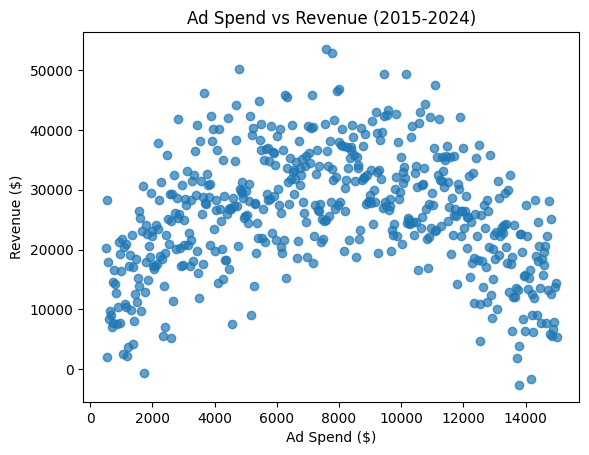

In [6]:
plt.scatter(df["ad_spend_usd"], df["revenue_usd"], alpha=0.7)
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.title("Ad Spend vs Revenue (2015-2024)")
plt.show()

## Data Preprocessing & Model Training - Linear Regression

In [7]:
X = df[["ad_spend_usd"]]
y = df["revenue_usd"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.predict([[8000]])

array([26148.92426362])

## Model Interpretation - Linear Regression

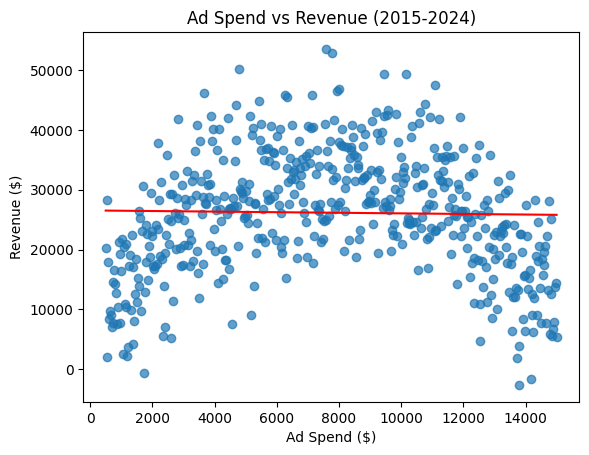

In [13]:
plt.scatter(df["ad_spend_usd"], df["revenue_usd"], alpha=0.7)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.title("Ad Spend vs Revenue (2015-2024)")
plt.show()

Here the equation of the red line can be represented as

$$
y = mx + c
$$

where  
$y$ represents the target variable — Revenue  
$x$ represents the feature variable — Ad Spend  
$m$ is the slope of the line  
$c$ is the y-intercept    

In machine learning terms, the same equation is written as 
$$
y = w_{1}x_{1} + b
$$

$y$ represents the target variable — Revenue  
$x_{1}$ represents the only feature variable present — Ad Spend  
$w_{1}$ is the slope of the line, in this case it is the co-efficient associated with $x_{1}$  
$b$ is the y-intercept also known as the bias term

In [14]:
model.coef_

array([-0.04901612])

In [15]:
model.intercept_

np.float64(26541.05324945445)

From the above values of co-efficient and bias terms the linear equation for this model can be written as

$$
y = \text{<co-efficient term>}x_{1} + \text{<bias term>}
$$

Report the coefficient and the intercept

Based on this linear equation let us build our own predict function and compare the results with `model.predict()`

In [16]:
def predict_revenue_usd_linear_regression(ad_spend_usd):
    return -0.04901612 * ad_spend_usd + 26541.05324945445

In [17]:
predict_revenue_usd_linear_regression(8000)

26148.92428945445

## Model Evaluation - Linear Regression

Now, getting back to our Revenue prediction, do you think that the linear regression model is doing a good job predicting the Revenue from Ad Spend feature? If we observe the graph, lot of data points are far away from the regression line. Let's quantify the performance of the model by calculating Root Mean Squared Error on train and test predictions

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
rmse_train = mean_squared_error(y_train, model.predict(X_train))**0.5
rmse_test = mean_squared_error(y_test, model.predict(X_test))**0.5

print(f"Train RMSE: {rmse_train:.6f}")
print(f"Test RMSE: {rmse_test:.6f}")

Train RMSE: 10188.503603
Test RMSE: 9927.306808


How can we optimize this? If you observe the data, it looks like a curve and not a straight line. That is why a regression line with linear equation is not able to predict the Revenue properly. The model should be able to come up with curve that is non-linear (not a straight line). The curve that describes the data clearly looks like a reverse parabola. The equation of a parabola can be written as 
$$
y = ax^2 + bx + c
$$
The same equation in machine learning terms can be written as 
$$
y = w_{1}x_{1} + w_{2}x_{2} + b
$$
where  
$x_{1}$ can be represented as $x^2$ from the quadratic equation,  
$x_{2}$ can be represented as $x$

This means that we need to create a new feature variable $x^2$ which is nothing but the square of Ad Spend

## Data Preprocessing & Model Training - Polynomial Regression

In [20]:
# Creating a new dataframe for polynomial features
X_poly = pd.DataFrame()

In [21]:
X_poly["ad_spend_usd_squared"] = df[["ad_spend_usd"]]**2
X_poly["ad_spend_usd"] = df[["ad_spend_usd"]]

In [22]:
X_poly.head()

,ad_spend_usd_squared,ad_spend_usd
0,250000.000000,500.000000
1,278605.663846,527.831094
2,308760.467284,555.662188
3,340464.410314,583.493282
4,373717.492936,611.324376


In [23]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [24]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

## Model Intrepretaton - Polynomial Regression

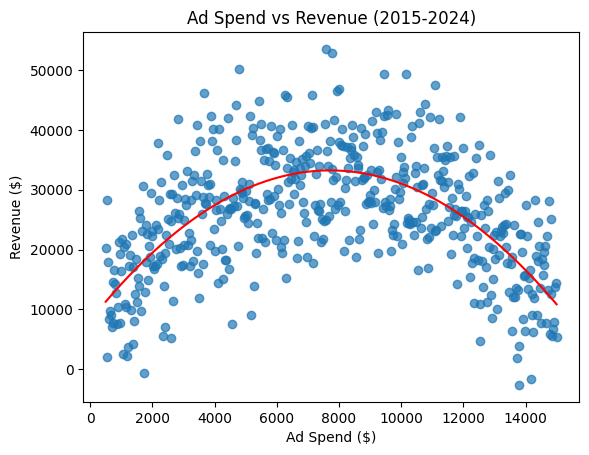

In [25]:
plt.scatter(df["ad_spend_usd"], df["revenue_usd"], alpha=0.7)
plt.plot(X_poly["ad_spend_usd"], poly_model.predict(X_poly), color="red")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Revenue ($)")
plt.title("Ad Spend vs Revenue (2015-2024)")
plt.show()

In [26]:
poly_model.coef_

array([-4.21948692e-04,  6.51043749e+00])

In [27]:
poly_model.intercept_

np.float64(8123.725871275172)

In [28]:
def predict_revenue_usd_polynomial_regression(ad_spend_usd):
    return -4.21948692e-04 * ad_spend_usd**2 + 6.51043749e+00 * ad_spend_usd + 8123.725871275172

In [29]:
predict_revenue_usd_polynomial_regression(8000)

33202.50950327517

## Model Evaluation - Polynomial Regression

In [30]:
rmse_train_poly = mean_squared_error(y_train, poly_model.predict(X_train_poly))**0.5
rmse_test_poly = mean_squared_error(y_test, poly_model.predict(X_test_poly))**0.5

print(f"Train RMSE: {rmse_train_poly:.6f}")
print(f"Test RMSE: {rmse_test_poly:.6f}")

Train RMSE: 7916.519019
Test RMSE: 7028.997447


## Model Deployment
The trained model can now be deployed through a **Streamlit application** to provide an interactive interface for digital marketing revenue prediction.  
In the app, a user can input weekly ad spending, and the underlying function will compute the predicted weekly revenue based on our trained model.  

Refer to `05_digital_marketing_ad_revenue_prediction/app.py` for the Streamlit application code.